# Netzwerke und Graphen

- Soziale Netzwerkanalyse ist angewandte Graphentheorie.
- Die Begriffe Graphen und Netzwerke werden im folgenden austauschbar benutzt.

## Graphen

### Ungerichtete Graphen
::::{grid}
:gutter: 2

:::{grid-item}
```{image} images/simple_graph.png
:alt: simple_graph
:width: 300px
```
:::

:::{grid-item-card} Einfache Graphen
In der einfachsten Form besteht ein Graph $G = (V,E)$ aus einer Menge von Knoten (oder auch Ecken) $V$ und einer Menge von Knotenpaaren $(i, j) \in E$, den Kanten die manche Knoten miteinander verbinden. 
:::
::::

**Beispiele:**

```{list-table}
:header-rows: 1

* - Netzwerk
  - Knoten
  - Kanten
* - Facebook Netzwerk
  - User
  - Freundschaften
* - Ko-Autoren Netzwerk
  - Autoren
  - Publikation gemeinsamer Paper
* - Hashtag Netzwerke
  - Hashtags
  - Gemeinsames Vorkommen in Beiträgen
* - ...
  - ...
  - ...
```

### Gerichtete Graphen

::::{grid}
:gutter: 2

:::{grid-item}
```{image} images/directed_graph.png
:alt: directed_graph
:width: 300px
```
:::

:::{grid-item-card} Gerichtete Graphen
In gerichteten Graphen $G = (V,E)$ besteht die Menge der Kanten $E$ aus geordneten Knotenpaaren, d.h. die Kante $<i, j> \in E$ zeigt von Knoten $i$ auf Knoten $j$. 
:::
::::

**Beispiele:**

```{list-table}
:header-rows: 1

* - Netzwerk
  - Knoten
  - Kanten
* - Instagram, Twitter, etc.
  - User
  - "folgt"
* - WWW
  - Webseiten
  - Hyperlinks
* - Email Kommunikation
  - Personen
  - Mail gesendet
* - ...
  - ...
  - ...
```

### Graphen mit Attributen

Knoten sowie Kanten können mit zusätzlichen Informationen versehen sein ($G = (V, E, A_V, A_E)).

**Beispiele:**

- Gewichtete Graphen (Kanten haben ein bestimmtes Gewicht, z.B. Anzahl Mails in einem Email-Netzwerk)
- Kategorische Attribute. Beispiel Twitter: Knoten (Official oder Private Account), Kanten (User Mention, Following)

## Graph Repräsenationen

Viele Graph Algorithmen arbeiten auf algebraischen Graph-Repräsentationen.

:::{admonition} Definition Adjazenzmatrix
Ein Netzwerk mit $n$ Knoten wird durch die Adjazenzmatrix $A \in \mathbb{R}^{n \times n}$ beschrieben.

$$
A_{i,j} = \begin{cases}
    -w(i,j) & \text{if } (i,j) \in E
    -0 & \text{otherwise.}
\end{cases}
$$

$w(i, j)$: Gewicht der Kante $(i,j)$.
:::

::::{grid}
:gutter: 2

:::{grid-item}
```{image} images/simple_graph.png
:alt: simple_graph
:width: 300px
```
:::

:::{grid-item-card} Einfache Graphen
In ungerichteten Netzwerken ist $A$ symmetrisch, d.h. $A_{i,j} = A_{j,i}.

```{list-table}
:header-rows: 1

* - 1
  - 2
  - 3
  - 4
  - 5
* - **1**
  - 0
  - 1
  - 0
  - 1
  - 1
* - **2**
  - 1
  - 0
  - 1
  - 0
  - 1
* - **3**
  - 0
  - 1
  - 0
  - 1
  - 0
* - **4**
  - 1
  - 0
  - 1
  - 0
  - 0
* - **5**
  - 1
  - 1
  - 0
  - 0
  - 0
```
:::
::::

::::{grid}
:gutter: 2

:::{grid-item}
```{image} images/directed_graph.png
:alt: directed_graph
:width: 300px
```
:::

:::{grid-item-card} Einfache Graphen
In gerichteten Netzwerken heißt $A_{i,j} = 1$ dass $<i,j> \in E$.

```{list-table}
:header-rows: 1

* - 1
  - 2
  - 3
  - 4
  - 5
* - **1**
  - 0
  - 1
  - 0
  - 0
  - 0
* - **2**
  - 0
  - 0
  - 1
  - 0
  - 1
* - **3**
  - 0
  - 0
  - 0
  - 1
  - 0
* - **4**
  - 1
  - 0
  - 0
  - 0
  - 0
* - **5**
  - 1
  - 0
  - 0
  - 0
  - 0
```
:::
::::

## Pfade und Distanzen

:::{admonition} Distanzen in Graph
Die Distanz der Knoten $i$ und $j$ in einem Graph $G$ ist die minimale Anzahl von Schritten um über die Kanten von $G$ von $i$ nach $j$ zu gelangen.

Die längste Distanz in $G$ wird Durchmesser (Diameter) von $G$ genannt.
:::

**Path Algebra**

Multipliziert man die Adjazenzmatrix $A$ eines Graphen mit sich selbst, erhält man eine neue Matrix deren Elemente die Anzahl der Pfade der Länge 2 zwischen allen Knotenpaaren angeben.

- $A$: Anzahl Pfade der Länge 1
- $A^2 = A \times A$, Anzahl Pfade der Länge 2
- $A^3 = A \times A \times A$, Anzahl Pfade der Länge 3
- ...

**Beispiel:**

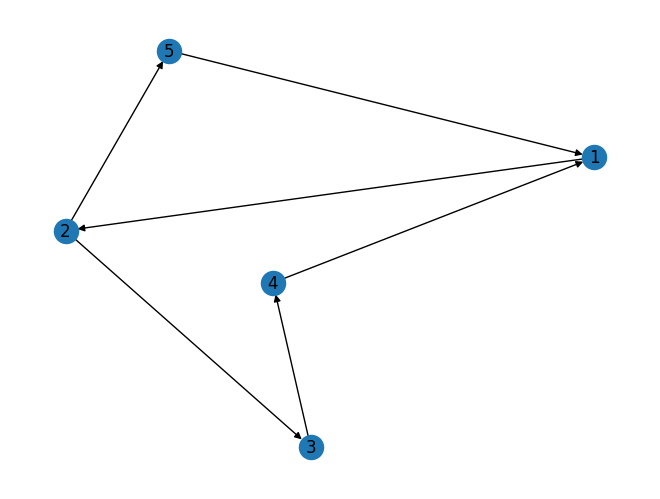

In [1]:
import networkx as nx

g = nx.read_gml('data/simple_graph.gml')
nx.draw(g, with_labels=True)

In [2]:
A = nx.adjacency_matrix(g)

(A * A * A).todense()

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int32)

## Dichte von Netzwerken

Die Dichte eines Netzwerks $\rho(G) = \frac{|E|}{|V|(|V| - 1)}$ 

:::{admonition} Dichte von Netzwerken
:class: tip
- Die meisten realen Netzwerke sind typischerweise spärlich, d.h. $\rho(G)$ ist recht klein.
- Wenn Netzwerke wachsen, nimmt deren Dichte typischerweise ab! (Mit jedem neuen Knoten steigt die Anzahl möglichker Kanten exponentiell, die Anzahl existierender Kanten jedoch nur linear). 
:::